# Title

In [ ]:
"""
    TITLE   : Composite Potentials in Galpy
    AUTHOR  : Nathaniel Starkman
    PROJECT : Astronat
""";

__author__ = 'Nathaniel Starkman'
__version__ = 'May 22, 2020'

<span style='font-size:30px;font-weight:650'>
    About
</span>
<br>

This notebook provides example recipes for composite potentials using the `GalpyCompositePotential` class in `astronat.dynamics.potential`.

Galpy has a very intuitive system for creating composite potentials: they can be bundled in a list, which even allows for nesting of potentials. The only drawback is that "labeling" the potentials, such as marking a group of potentials as being part of a disk model, and another group as a bulge/bar/spheroid system is less intuitive. The `GalpyCompositePotential` bridges this gap by subclassing list, for full galpy operability, but maintaining an index-valued dictionary that for the potential's labels. Both list and dictionary methods are supported.


<br><br>

- - - 


## Prepare

### Imports

In [2]:
# THIRD PARTY

from galpy.orbit import Orbit
from galpy import potential

import numpy as np


# PROJECT-SPECIFIC

from astronat.dynamics.potential import GalpyCompositePotential

set autoreload to 1


<br><br>

- - - 


## Creating a Composite Potential

The `GalpyCompositePotential` input is very flexible. The variety of options are explained in the docstring, and will be demonstrated subsequently.

In [3]:
GalpyCompositePotential?

Init signature:
GalpyCompositePotential(
    pots: Union[NoneType, ~GalpyPotentialType] = None,
    names: Union[str, Sequence, NoneType] = None,
    **components,
)
Docstring:     
A composite Galpy potential composed of distinct components.

Galpy supports composition through lists, and this class is fully
compatible with all list methods, as it subclasses list. Additionally,
many dictionary methods are supported, such as item access by key, view
methods like ``.keys()`` and ``.values()``, and some other convenience
methods.

Attributes
----------
_components : OrderedDict
    keys are component names, values are index into self

Methods
-------
pack_pots
    For packing a potential, list of potentials (in a few
    different formats), or dictionary into an OrderedDict for Potential
    composition.
__getitem__
    In addition to all standard list inputs, allows component names (str,
    in `_components`) as keys or start, stop value in a slice object.
keys
    same as in dict
values

### Making an empty `GalpyCompositePotential`

In [4]:
empty_pot = GalpyCompositePotential()

In [5]:
len(empty_pot)

0

Of course, a potential can be added (with or without a name).

In [6]:
empty_pot.extend(potential.DehnenCoreSphericalPotential(), "Dehnen Core")

empty_pot

GalpyCompositePotential: ([
	('Dehnen Core', <galpy.potential.TwoPowerSphericalPotential.DehnenCoreSphericalPotential object at 0x122710510>)
])

### Creating from a list

In [7]:
galpy_standard = [potential.PowerSphericalPotentialwCutoff(), potential.MiyamotoNagaiPotential(), potential.NFWPotential()]  # AKA MWPotential14

Now creating 

In [9]:
list_pot = GalpyCompositePotential(galpy_standard, names=["bulge", "disk", "halo"])

list_pot

GalpyCompositePotential: ([
	('bulge', <galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x1227242d0>),
	 ('disk', <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x1227240d0>),
	 ('halo', <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x122724490>)
])

alternatively, this can be created from an OrderedDict-style list.

In [10]:
od_pot = GalpyCompositePotential([("bulge", potential.PowerSphericalPotentialwCutoff()), ("disk", potential.MiyamotoNagaiPotential()), ("halo", potential.NFWPotential())])

In [11]:
od_pot

GalpyCompositePotential: ([
	('bulge', <galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x1227106d0>),
	 ('disk', <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x1227103d0>),
	 ('halo', <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x122710050>)
])

### Creating from a dictionary

In [12]:
dct_pot = GalpyCompositePotential({
    "bulge": potential.PowerSphericalPotentialwCutoff(),
    "disk": potential.MiyamotoNagaiPotential(),
    "halo": potential.NFWPotential()
})

dct_pot

GalpyCompositePotential: ([
	('bulge', <galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x12272e090>),
	 ('disk', <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x12272e1d0>),
	 ('halo', <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x12272e2d0>)
])

### Creating from another Composite Potential

Note that it copies the potential.

In [13]:
cp_pot = GalpyCompositePotential(dct_pot)

cp_pot

GalpyCompositePotential: ([
	('304557577', <galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x12272e090>),
	 ('304557598', <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x12272e1d0>),
	 ('304557615', <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x12272e2d0>)
])

### Creating by key-word argument

In [14]:
kw_pot = GalpyCompositePotential(bulge=potential.PowerSphericalPotentialwCutoff(),
                                 disk=potential.MiyamotoNagaiPotential(),
                                 halo=potential.NFWPotential())

kw_pot

GalpyCompositePotential: ([
	('bulge', <galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x12272ee10>),
	 ('disk', <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x12272ec10>),
	 ('halo', <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x12272ebd0>)
])

### Mixing Methods

In [15]:
mm_pot = GalpyCompositePotential(potential.DehnenBarPotential(), names="bar",
                                 bulge=potential.PowerSphericalPotentialwCutoff(),
                                 disk=potential.MiyamotoNagaiPotential(),
                                 halo=potential.NFWPotential())

mm_pot

GalpyCompositePotential: ([
	('bar', <galpy.potential.DehnenBarPotential.DehnenBarPotential object at 0x122734650>),
	 ('bulge', <galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x1227347d0>),
	 ('disk', <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x122734710>),
	 ('halo', <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x122734610>)
])

### Nesting Potentials

In [16]:
galcen = [potential.DehnenBarPotential(), potential.PowerSphericalPotentialwCutoff()]

nl_pot = GalpyCompositePotential(spheroid=galcen, disk=potential.MiyamotoNagaiPotential(), halo=potential.NFWPotential())

nl_pot

GalpyCompositePotential: ([
	('spheroid', [<galpy.potential.DehnenBarPotential.DehnenBarPotential object at 0x122734f10>, <galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x122734d10>]),
	 ('disk', <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x122734f50>),
	 ('halo', <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x1227420d0>)
])

And GalpyCompositePotential can also be nested

In [54]:
galcen = GalpyCompositePotential(bar=potential.DehnenBarPotential(), bulge=potential.PowerSphericalPotentialwCutoff())

ncc_pot = GalpyCompositePotential(spheroid=galcen, disk=potential.MiyamotoNagaiPotential(), halo=potential.NFWPotential())

ncc_pot

GalpyCompositePotential: ([
	('spheroid', GalpyCompositePotential: ([
	('bar', <galpy.potential.DehnenBarPotential.DehnenBarPotential object at 0x12587c850>),
	
	 ('bulge', <galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x125760550>)
])),
	 ('disk', <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x12587ca10>),
	 ('halo', <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x125760090>)
])

## Demonstrating Integration.

In [18]:
o = Orbit()
t = np.linspace(0, 10)

o.integrate(t, potential.MWPotential2014)

/Users/nathanielstarkman/miniconda3/lib/python3.7/site-packages/galpy-1.6.0.dev0-py3.7-macosx-10.9-x86_64.egg/galpy/orbit/Orbits.py:1158: galpyWarningVerbose: Using C implementation to integrate orbits
  galpyWarningVerbose)



In [22]:
o.integrate(t, empty_pot)  # recall, it had a potential added in

/Users/nathanielstarkman/miniconda3/lib/python3.7/site-packages/galpy-1.6.0.dev0-py3.7-macosx-10.9-x86_64.egg/galpy/orbit/Orbits.py:1158: galpyWarningVerbose: Using C implementation to integrate orbits
  galpyWarningVerbose)



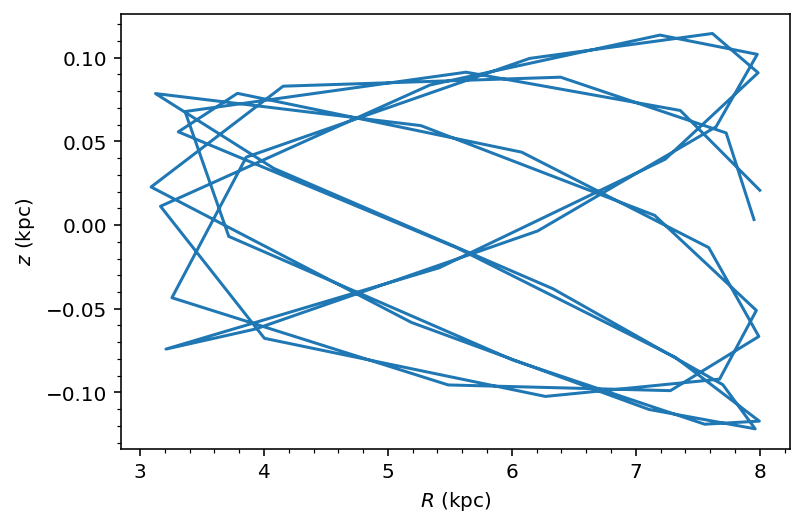

In [43]:
o.integrate(t, list_pot)
o.plot()

In [53]:
o.integrate(t, od_pot)

In [46]:
o.integrate(t, dct_pot)

In [47]:
o.integrate(t, cp_pot)

In [48]:
o.integrate(t, kw_pot)

In [49]:
o.integrate(t, mm_pot)

In [50]:
o.integrate(t, nl_pot)

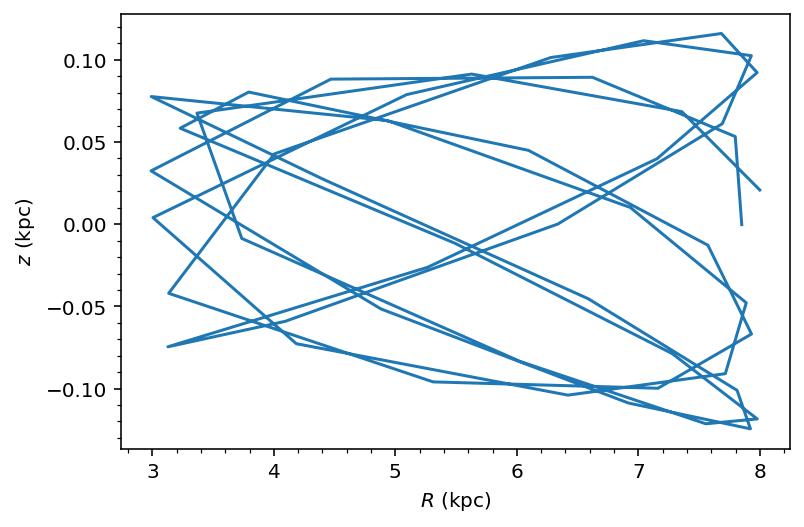

In [51]:
o.integrate(t, ncc_pot)
o.plot()

<br><br>

- - - 
- - - 

<span style='font-size:40px;font-weight:650'>
    END
</span>